# Цель лабораторной работы

Изучить различные методы визуализации данных

# Задание

Требуется выполнить следующие действия
* Выбрать набор данных
* Создать ноутбук, который содержить следующие разделы:
  1. Текстовое описание выбранного наборы данных
  2. Основные характеристики датасета
  3. Визуальное исследование датасета
  4. Информация о корелляции признаков
* Сформировать отчет и разместить его на своем репозитории GitHub

# Ход выполнения лабораторной работы

## Текстовое описание набора данных
   
   В качестве набора данных используются данные о стоимости домов в Бостоне.  
   Данный датасет содержит следующие колонки:
   * CRIM уровень преступности на душу населения по городам
   * ZN доля жилой земли, зонированной на участки свыше 25 000 кв.фут.
   * INDUS доля акров не-розничного бизнеса в городе
   * CHAS Фиктивная переменная Чарльза (= 1, Если тракт ограничивает реку; 0 в противном случае)
   * NOX концентрация оксидов азота (частей на 10 млн.)
   * RM среднее количество комнат в одном жилом помещении
   * AGE доля единиц, занятых владельцами, построенных до 1940 года
   * DIS взвешенные расстояния до пяти бостонских центров занятости
   * RAD индекс доступности до радиальных магистралей
   * TAX ставка налога на имущество на полную стоимость за 10 000 долл. США
   * PTRATIO Соотношение учеников и учителей по городам
   * B 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам
   * LSTAT \% более низкий статус населения
   * MEDV Средняя стоимость домов, занимаемых владельцами, в 1000 долларов
   
## Основные характеристики датасета
   
   Подключим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import math
from sklearn import utils
from typing import Dict, Tuple
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
#Загрузка данных
data = pd.read_csv('./Admission_Predict.csv', sep=",")

In [3]:
#Параметры данных.Количество строк и стобцов
data.shape

(400, 9)

In [4]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
print('Кажется,что наши данные чисты')

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0
Кажется,что наши данные чисты


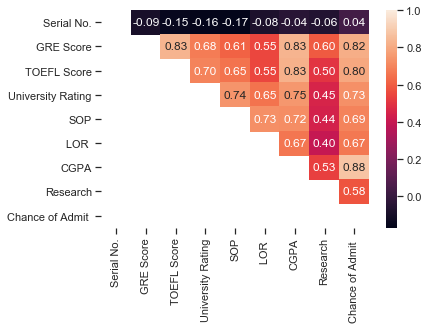

In [5]:
# Треугольный вариант матрицы корреляции
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(method='spearman'), mask=mask, annot=True, fmt='.2f')

Закрадываются подозрения на связь CGPA-Chance of Admit

In [6]:
data.columns
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Чем-то похоже на y=x


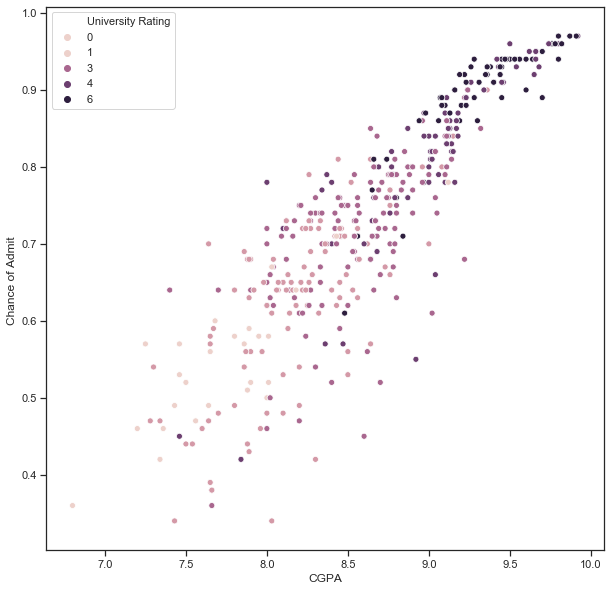

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CGPA', y='Chance of Admit ', data=data, hue='University Rating')
#Чем-то похоже на функцию вида y=x


In [8]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [9]:
x_array = data['CGPA'].values
y_array = data['Chance of Admit '].values

In [10]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1
#Наши коэффициенты

(-1.0715116629341392, 0.20884722950068055)

In [11]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [12]:
y_array_regr = y_regr(x_array, b0, b1)

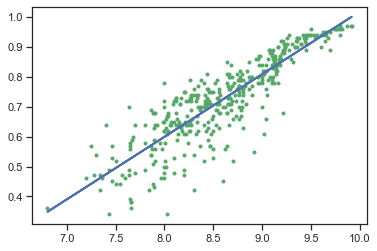

Линейная зависимость действительно заметна


In [13]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()
print('Линейная зависимость действительно заметна')

In [14]:
reg1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, reg1.coef_), (b0, reg1.intercept_)

((0.20884722950068055, array([[0.20884723]])),
 (-1.0715116629341392, array([-1.07151166])))

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('linear', LinearRegression(fit_intercept=False))])

In [17]:
poly_model.fit(x_array.reshape(-1, 1), y_array)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [18]:
poly_y_pred = poly_model.predict(x_array.reshape(-1, 1))


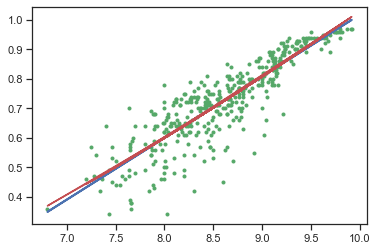

Посмотрим как будет выглядеть квадратичный аппроксимирующий полином


In [19]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.plot(x_array, poly_y_pred, 'r', linewidth=1.5)
plt.show()
print('Посмотрим как будет выглядеть квадратичный аппроксимирующий полином')

boxplot


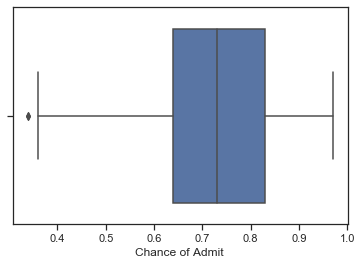

In [20]:
sns.boxplot(x=data['Chance of Admit '])
print('boxplot')

boxplot


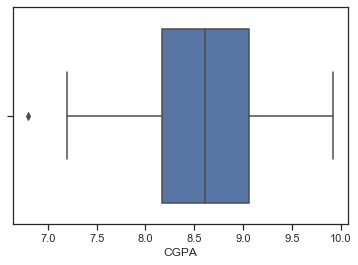

In [21]:
sns.boxplot(x=data['CGPA'])
print('boxplot')

Плотность вероятности распределения данных


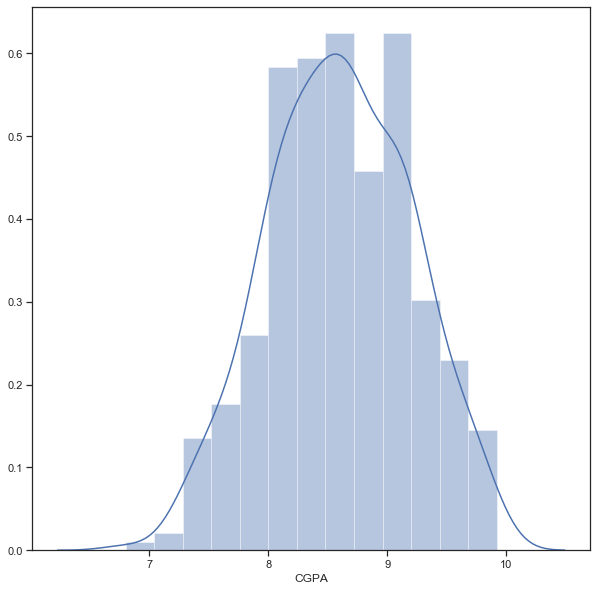

In [22]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['CGPA'])
print('Плотность вероятности распределения данных')

Плотность вероятности распределения данных


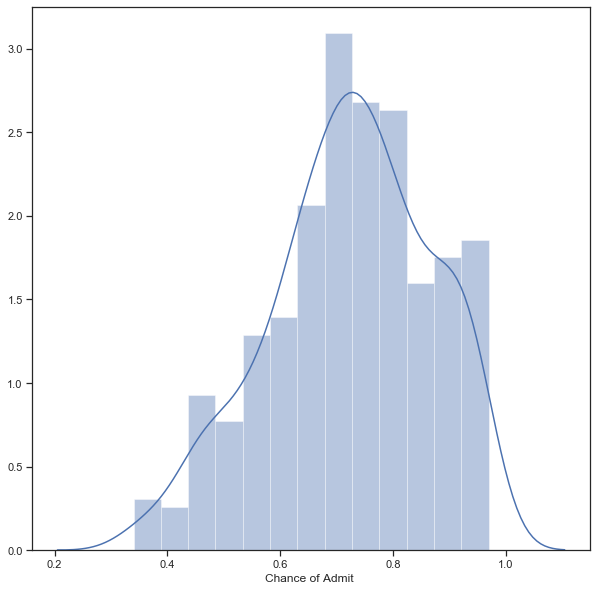

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Chance of Admit '])
print('Плотность вероятности распределения данных')

In [24]:
data.groupby("University Rating").mean()#.plot.pie(y='Chance of Admit ',figsize = (10,10))

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [25]:
admit_df = pd.DataFrame(data= np.c_[data['CGPA'], data['GRE Score'],data['Chance of Admit ']],columns=['Avg score by sem']+['Recom exam score']+['Chance'])

In [26]:
admit_df.describe()

,Avg score by sem,Recom exam score,Chance
count,400.000000,400.000000,400.000000
mean,8.598925,316.807500,0.724350
std,0.596317,11.473646,0.142609
min,6.800000,290.000000,0.340000
25%,8.170000,308.000000,0.640000
50%,8.610000,317.000000,0.730000
75%,9.062500,325.000000,0.830000
max,9.920000,340.000000,0.970000


In [27]:
admit_df.head()

,Avg score by sem,Recom exam score,Chance
0,9.65,337.0,0.92
1,8.87,324.0,0.76
2,8.00,316.0,0.72
3,8.67,322.0,0.80
4,8.21,314.0,0.65


In [32]:
sqr=0
for elem in admit_df.iterrows():
    sqr+=(elem[1][0]-elem[1][2]*10)**2
print(math.sqrt(sqr/admit_df.shape[0]))
print('Среднеквадратичное отклонение между нашими параметрами')

1.6549792294769134
Среднеквадратичное отклонение между нашими параметрами


#На основании всех полученных данных можно сделать следующие выводы
#1) Самую большую связь друг с другом имеют колонки: CGPA,TOEFL Score и Chance of Admit
#2) Колонки Research(в меньшей степени) и Serial No(в большей степени) слабо связаны с остальными данными и могут быть удалены
#3) Колонки CGPA и Chance of Admit имеют почти линейную зависимость , а следовательно методы линейной регрессии будут максимально эффективны для исследования.


